<a href="https://colab.research.google.com/github/syedameen16/OIBSIP/blob/main/Oasis_Infobyte_Internship_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Oasis Infobyte Internship./spam.csv",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.isnull().mean()

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [9]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['text length']=df['v2'].apply(len)

In [14]:
df

,v1,v2,text length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


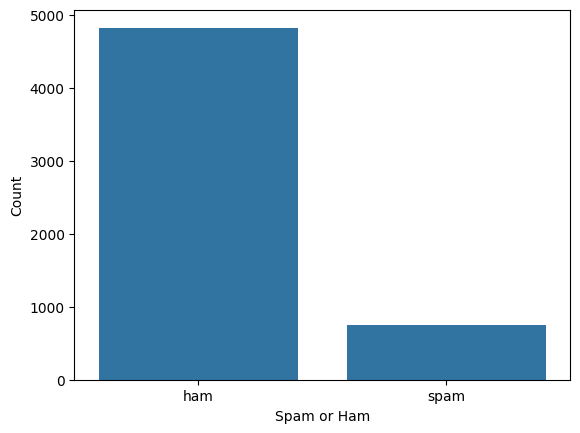

In [17]:
sns.countplot(x='v1',data=df)
plt.xlabel("Spam or Ham")
plt.ylabel("Count")
plt.show()

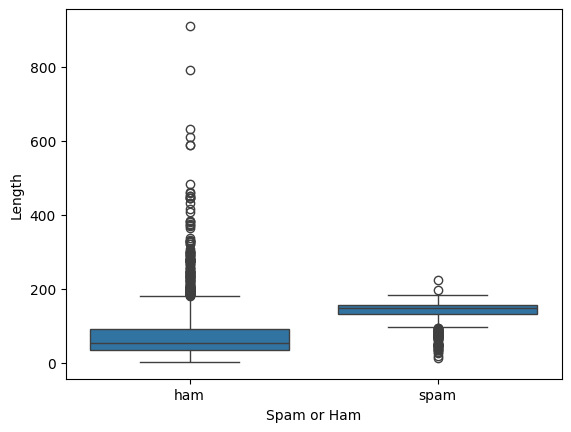

In [18]:
sns.boxplot(x='v1',y='text length',data=df)
plt.xlabel("Spam or Ham")
plt.ylabel("Length")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
X_train,X_test,y_train,y_test=train_test_split(df['v2'],df['v1'],test_size=0.2,random_state=42)

In [28]:
vectorizer=CountVectorizer()
X_train_vectorized=vectorizer.fit_transform(X_train.values)
X_test_vectorized=vectorizer.transform(X_test.values)

In [22]:
classifier=MultinomialNB()
classifier.fit(x_train_count,y_train)

MultinomialNB()

In [29]:
y_pred=classifier.predict(X_test_vectorized)

In [31]:
accuracy=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

In [32]:
print("Accuracy:",accuracy)
print("Confusion Matrix:\n",conf_mat)
print("Classification Report:\n",class_report)

Accuracy: 0.9838565022421525
Confusion Matrix:
 [[963   2]
 [ 16 134]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

